## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [27]:
import numpy as np


def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # TODO: Generate the dataset with
    X = np.random.uniform(range_start, range_end, num_samples)
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3 + np.random.normal(0, noise_std, num_samples)
    return X, y

In [32]:
X, y = generate_dataset(-4, -1, 1000)
# X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)
pass

In [33]:
print(X[:10], y[:10])

[-3.02545598 -3.64384534 -2.34474136 -3.80573261 -2.52231837 -3.04225224
 -1.99166242 -3.47766378 -1.43516796 -1.54647112] [208.33537665 334.12572562 119.15635896 380.21299032 129.98559595
 205.95856496  79.04885141 307.78525136  33.80829729  43.55884115]


In [34]:
print(X.shape, y.shape)

(1000,) (1000,)


## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [35]:
from sklearn.model_selection import train_test_split

degree = 5

# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate out-of-range testing set
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_test_in_range))
# X_test_out_of_range = X_test_out_of_range.reshape(-1, 1)
# y_test_out_of_range = y_test_out_of_range.reshape(-1, 1)
pass

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    polynomial_features = PolynomialFeatures(degree=degree)
    model = make_pipeline(polynomial_features, LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    return model

In [37]:
train_polynomial_regression(X_train, y_train, 3)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [38]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [39]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    # TODO: Calculate each model's loss on the sets.
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses


In [40]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


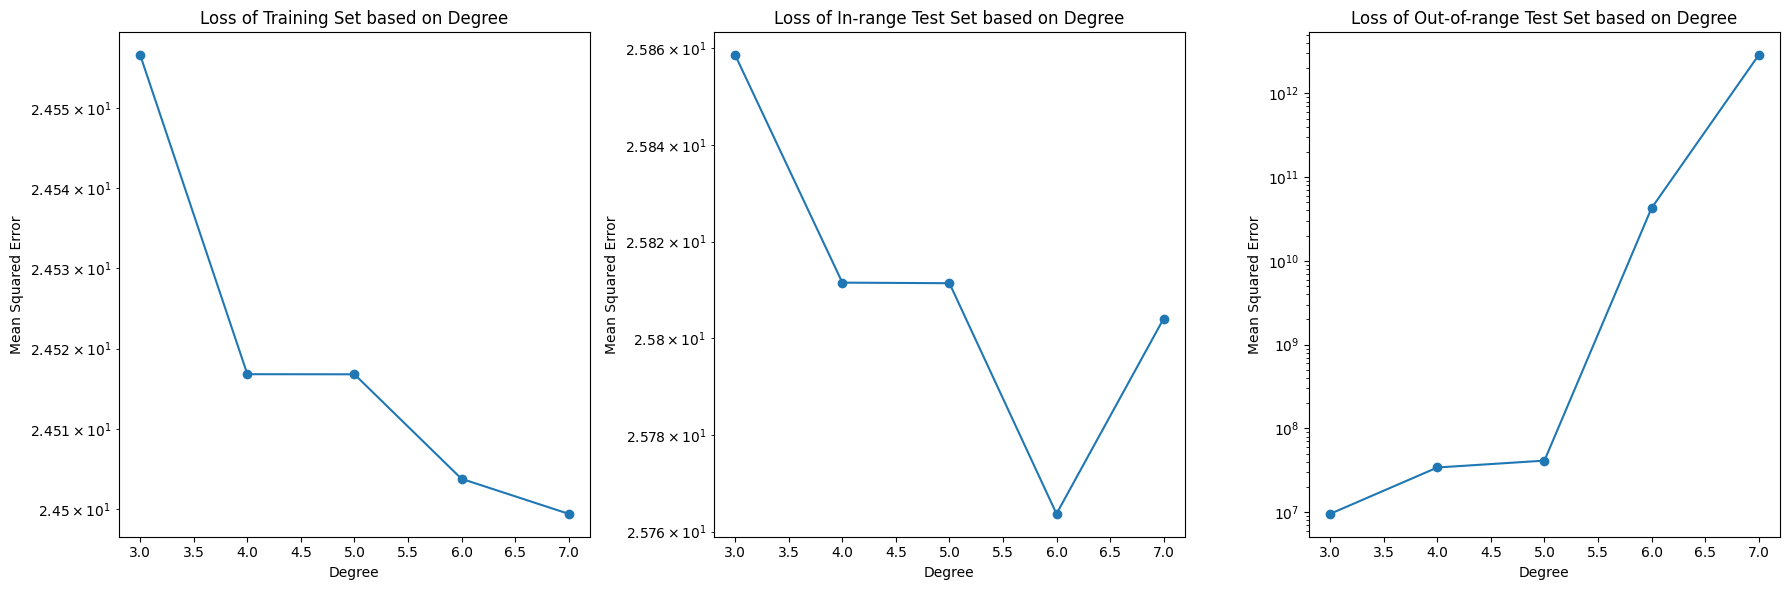

In [41]:
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter


# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
ax1.plot(list(losses_train.keys())[1:], list(losses_train.values())[1:], marker='o')
ax1.set_title('Loss of Training Set based on Degree')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Mean Squared Error')
# current_values = ax1.get_yticks()
# ax1.set_yticklabels(['{:,.3f}'.format(x) for x in current_values])
ax1.set_yscale('log')

# TODO: Plot logarithm of losses of in-range test set
ax2.plot(list(losses_in_range.keys())[1:], list(losses_in_range.values())[1:], marker='o')
ax2.set_title('Loss of In-range Test Set based on Degree')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Mean Squared Error')
# current_values = ax2.get_yticks()
# ax2.set_yticklabels(['{:,.3f}'.format(x) for x in current_values])
ax2.set_yscale('log')

# TODO: Plot logarithm of losses of out-of-range test set
ax3.plot(list(losses_out_of_range.keys())[1:], list(losses_out_of_range.values())[1:], marker='o')
ax3.set_title('Loss of Out-of-range Test Set based on Degree')
ax3.set_xlabel('Degree')
ax3.set_ylabel('Mean Squared Error')
# current_values = ax3.get_yticks()
# ax3.set_yticklabels(['{:,}'.format(x) for x in current_values])
ax3.set_yscale('log')

plt.tight_layout()
plt.show()

## Conclusion (10 Points)

Now print out the losses on each set here.

In [42]:
# TODO: print each model loss on the training and the two test sets

print(f"Training Set Losses: {losses_train}")

print(f"In-range Test Set Losses: {losses_in_range}")

print(f"Out-of-range Test Set Losses: {losses_out_of_range}")

Training Set Losses: {2: 31.504776469064367, 3: 24.55655103207001, 4: 24.516806840332855, 5: 24.516794108483893, 6: 24.503785548571976, 7: 24.499431846814577}
In-range Test Set Losses: {2: 32.32339325616974, 3: 25.85859398125464, 4: 25.811490197154384, 5: 25.811370930400226, 6: 25.763690329383447, 7: 25.804021872053987}
Out-of-range Test Set Losses: {2: 256638.8350627236, 3: 9567445.434012236, 4: 34170034.88096513, 5: 41268469.04443751, 6: 42636185648.487686, 7: 2854535423755.663}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**
When comparing the loss of the training set and the in-range test set, especially in higher degrees of polynomial regression models, we typically observe a decrease in training set loss and a relatively low loss on the in-range test set. This phenomenon indicates that the model is capturing the training data's complexity well, fitting even intricate patterns present in the training data. However, as the degree of the polynomial increases, the model becomes overly complex, leading to overfitting.

when comparing the loss of the in-range test set and the out-of-range test set, especially in higher degrees, we often notice a significant increase in loss on the out-of-range test set compared to the in-range test set. This discrepancy indicates that the model's ability to generalize to unseen data outside the range of the training data deteriorates as the model complexity increases. The overfitted model, while performing well on the training and in-range test data, lacks the ability to generalize to new data points that lie outside the range of the training data. This lack of generalization is a characteristic of high variance, where the model is too sensitive to the noise and fluctuations in the training data, failing to capture the underlying true patterns.

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.